In [1]:
pip install gmplot

     |████████████████████████████████| 122kB 2.9MB/s 
  Created wheel for gmplot: filename=gmplot-1.2.0-cp36-none-any.whl size=143765 sha256=6e6cfe5fb088275a4d37877a645bbae6dd3f6ac622d3a1f6ff5126339663f88c
  Stored in directory: /root/.cache/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import gmplot

In [0]:
data =pd.read_csv('https://raw.githubusercontent.com/coolmancommet/Hcktober/master/traingit.csv')

In [4]:
data.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [27]:
# for x in data.dropoff_latitude:
#   if x<-90:
#     print(x)
#   if x>90:
#     print(x)
# for x in data.pickup_latitude:
#   if x<-90:
#     print(x)
#   if x>90:
#     print(x)
# for x in data.dropoff_longitude:
#   if x<-180:
#     print(x)
#   if x>180:
#     print(x)
# for x in data.pickup_longitude:
#   if x<-180:
#     print(x)
#   if x>180:
#     print(x)
data[data.dropoff_latitude>90]


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
92310,92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.68188,-73.97331,404.616667,1,272.174283


working


In [0]:
dt=pd.DataFrame()

In [0]:
dt['lat1']=data.pickup_latitude
dt['lon1']=data.pickup_longitude
dt['lat2']=data.dropoff_latitude
dt['lon2']=data.dropoff_longitude

In [7]:
dt

,lat1,lon1,lat2,lon2
0,40.721319,-73.844311,40.712278,-73.841610
1,40.711303,-74.016048,40.782004,-73.979268
2,40.761270,-73.982738,40.750562,-73.991242
3,40.733143,-73.987130,40.758092,-73.991567
4,40.768008,-73.968095,40.783762,-73.956655
...,...,...,...,...
99995,40.784792,-73.947977,40.792347,-73.964262
99996,40.799107,-73.962918,40.786487,-73.974178
99997,40.723549,-73.996773,40.724724,-73.991974
99998,40.756667,-73.983652,40.767067,-73.982715


In [0]:
radius = 3963.105 
dlat = np.radians(dt.lat2-dt.lat1)
dlon = np.radians(dt.lon2-dt.lon1)
a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(dt.lat1)) \
    * np.cos(np.radians(dt.lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
dt['dist'] = radius * c


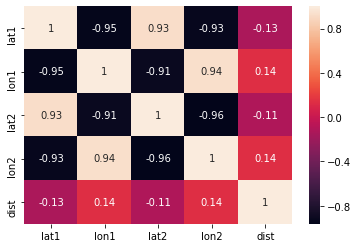

In [9]:
sns.heatmap(dt.corr(),annot=True)

In [0]:
data['distance']=dt.dist

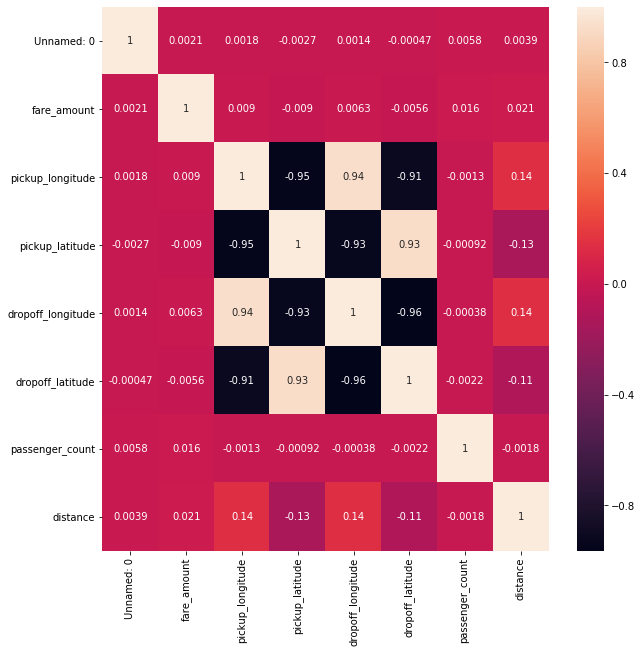

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

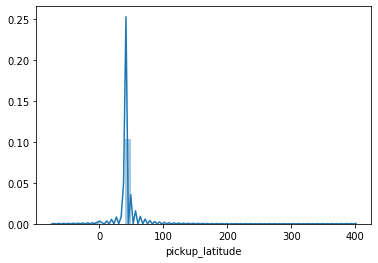

In [12]:
sns.distplot(data.pickup_latitude)

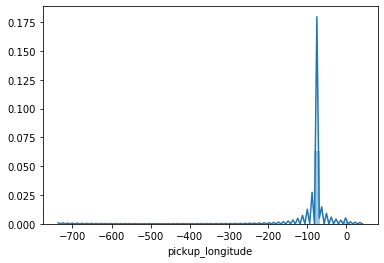

In [13]:
sns.distplot(data.pickup_longitude)

In [0]:
immm=plt.imread('https://github.com/coolmancommet/Hcktober/blob/master/nyc_-74.1_-73.7_40.6_40.85.PNG?raw=True')

In [15]:
immm.show()

AttributeError: ignored

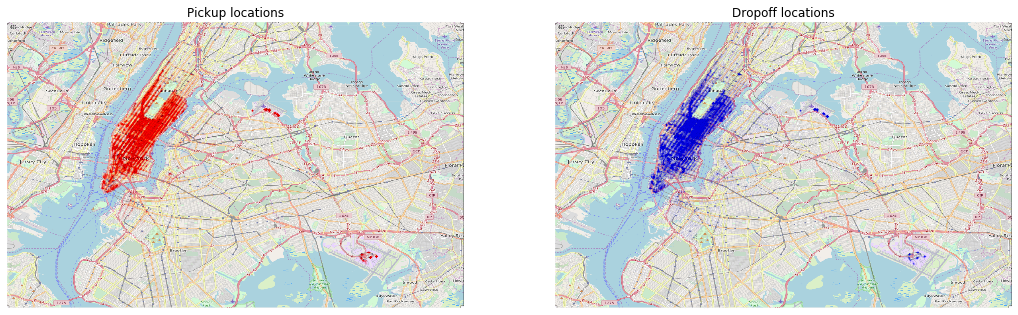

In [16]:
BB_zoom = (-74.1, -73.7, 40.6, 40.85)
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2, color = False):
    fig, axs = plt.subplots(1, 2, figsize=(18, 22))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].axis('off')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='b', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].axis('off')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    
# plot training data on map zoomed in
plot_on_map(data, 
            BB_zoom, immm, s=0.05, alpha=0.05)